# Multi Layer Perceptron (MLP)

>### [예제 1] 2 Input Logic Gate (Logistic Regression)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
# Logistic regression : Logic Gate Truth Table
x_input = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]],dtype=tf.float32)
labels = tf.constant([[0], [0], [0], [1]],dtype=tf.float32)  # Gate : AND
# labels = tf.constant([[0], [1], [1], [1]],dtype=tf.float32)  # Gate : OR
# labels = tf.constant([[1], [1], [1], [0]],dtype=tf.float32)  # Gate : NAND
# labels = tf.constant([[1], [0], [0], [0]],dtype=tf.float32)  # Gate : NOR
# labels = tf.constant([[0], [1], [1], [0]],dtype=tf.float32)  # Gate : XOR

# Weight, Bias
W = tf.Variable(tf.random.normal((2, 1),dtype=tf.float32))
B = tf.Variable(tf.random.normal((1, 1),dtype=tf.float32))

>## Hypothesis

In [3]:
# Hyoithesis, Cost, Optimizer
def Hypothesis(x):
  return tf.sigmoid(tf.matmul(x, W) + B)

eps = 1e-7  # prevent log(0) => infinite
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)+eps) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input) + eps)) 

### 학습 (Training)

In [4]:
%%time
# 학습 (Training)

epochs = 50000
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

check = np.array([0, epochs*0.02, epochs*0.04, epochs*0.4, epochs*0.8, epochs])
w_trained = []
b_trained = []
check_idx = 0

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(cnt, cost_graph[cnt], W[0][0], W[1][0], B[0][0]))
  if check[check_idx] == cnt:
    w_trained.append(W.numpy())
    b_trained.append(B.numpy())
    check_idx += 1

  optimizer.minimize(Cost, [W, B])

[    0] cost =     0.6399, w = [[-0.2845] [-0.2836]], b = [[   -1.0]]
[ 2500] cost =     0.3167, w = [[  1.319] [  1.319]], b = [[ -2.319]]
[ 5000] cost =     0.2225, w = [[  2.086] [  2.086]], b = [[ -3.391]]
[ 7500] cost =     0.1727, w = [[  2.636] [  2.636]], b = [[ -4.186]]
[10000] cost =     0.1412, w = [[  3.072] [  3.072]], b = [[ -4.824]]
[12500] cost =     0.1192, w = [[  3.434] [  3.434]], b = [[ -5.357]]
[15000] cost =     0.1031, w = [[  3.744] [  3.744]], b = [[ -5.816]]
[17500] cost =    0.09068, w = [[  4.016] [  4.016]], b = [[ -6.219]]
[20000] cost =    0.08087, w = [[  4.257] [  4.257]], b = [[ -6.577]]
[22500] cost =    0.07292, w = [[  4.474] [  4.474]], b = [[   -6.9]]
[25000] cost =    0.06636, w = [[  4.671] [  4.671]], b = [[ -7.194]]
[27500] cost =    0.06086, w = [[  4.852] [  4.852]], b = [[ -7.463]]
[30000] cost =    0.05617, w = [[  5.018] [  5.018]], b = [[ -7.711]]
[32500] cost =    0.05214, w = [[  5.173] [  5.173]], b = [[ -7.942]]
[35000] cost =    0.

>### Training Test

In [5]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = Hypothesis(x_input).numpy()
y = y.reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [0. 0.] , Target : [0.] => Y : 0(y:0.0001)
Input [0. 1.] , Target : [0.] => Y : 0(y: 0.04)
Input [1. 0.] , Target : [0.] => Y : 0(y: 0.04)
Input [1. 1.] , Target : [1.] => Y : 1(y: 0.94)


> ### Ploting : Cost/Training Count

<function matplotlib.pyplot.show>

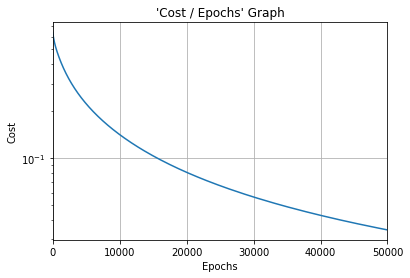

In [6]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show

> ### Decesion boundary

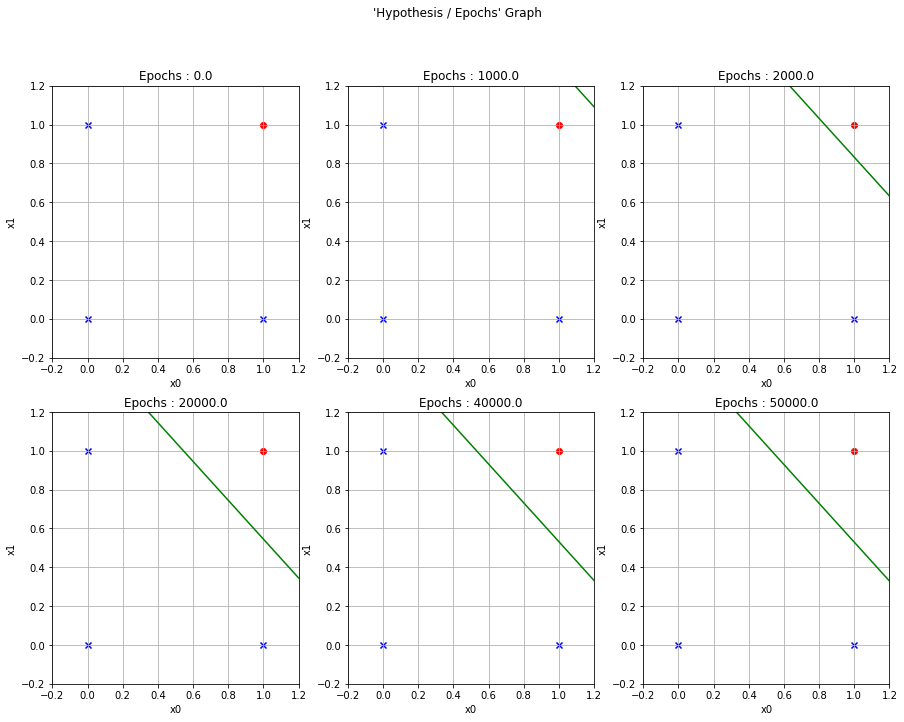

In [7]:
# 구분선 그리기
x_decision = np.linspace(-0.2, 1.2, 1000)

fig, ax = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Epochs' Graph")

for ax_idx in range(check.size):
    W = w_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0][0] * x_decision + B[0][0])/W[1][0] 

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='blue', marker="x")
        else:
            ax[ax_idx // 3][ax_idx % 3].scatter(x_input[i][0], x_input[i][1], color='red', marker="o")
   
    ax[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, color='green')

    ax[ax_idx // 3][ax_idx % 3].set_title("Epochs : {}".format(check[ax_idx]))
    ax[ax_idx // 3][ax_idx % 3].set_xlim((-0.2, 1.2))
    ax[ax_idx // 3][ax_idx % 3].set_ylim((-0.2, 1.2))
    ax[ax_idx // 3][ax_idx % 3].set_xlabel("x0")
    ax[ax_idx // 3][ax_idx % 3].set_ylabel("x1")
    ax[ax_idx // 3][ax_idx % 3].grid(True)
    
plt.show()